<h1>Big Data Programming - Asssignment-10</h1>
<h2>Ajay Luhar : 8897306</h2>
<span>Dataset:2 - Loan Dataset</span>

<h1>Task 1 - Dataset Selection</h1>
<p>The loan dataset is well suited for machine learning applications and has significant potential for thorough analysis. The dataset includes a wide range of pertinent factors that are important for understanding loan acceptance and repayment behaviour, including gender, marital status, education level, income information, credit history, and property type. These characteristics reveal information about the demographics, financial capability, and creditworthiness of the applicant. Predictive modelling for loan approval, risk assessment, and the identification of factors impacting loan outcomes can be made possible by utilising machine learning algorithms on this dataset. On the basis of the given features, classification tasks can be used to forecast whether loan applications will be granted or denied. The dataset's analytical applicability makes it a perfect tool for automating the loan approval process, strengthening decision-making, and increasing efficiency in the lending sector. Combining the wealth of data in the loan dataset with machine learning techniques enables financial institutions to make more informed, fair, and precise loan decisions while revealing hidden patterns and trends that may be challenging to spot using conventional analysis techniques.</p>

<p>Dataset Link: <a>https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan</a></p>

In [117]:
#import Required Libraries here
import pandas as pd
import numpy as np

In [118]:
#importing the data set here
df_AJ = pd.read_csv("C:/Users/ajayp/Downloads/Loan_Data.csv")

<h1>Task 2</h1>

In [119]:
# Display the first few rows to get an overview of the data
df_AJ.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [120]:
# Summary statistics of dataset
df_AJ.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [121]:
#check datatypes and missing values
print(df_AJ.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [122]:
#finding all the missing values
df_AJ.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

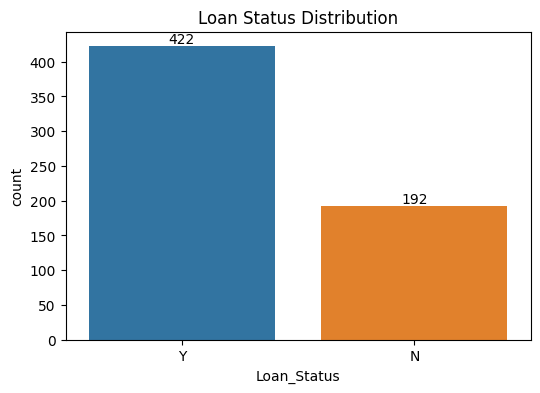

In [123]:
#identifying loan status Distribution of approved Y and not approved N
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Loan_Status", data=df_AJ)

approved_count = df_AJ[df_AJ['Loan_Status'] == 'Y'].shape[0]
not_approved_count = df_AJ[df_AJ['Loan_Status'] == 'N'].shape[0]

# Annotate the approved and not-approved counts on top of each bar
ax.annotate(f'{approved_count}', xy=(0, approved_count), ha='center', va='bottom')
ax.annotate(f'{not_approved_count}', xy=(1, not_approved_count), ha='center', va='bottom')

plt.title("Loan Status Distribution")
plt.show()


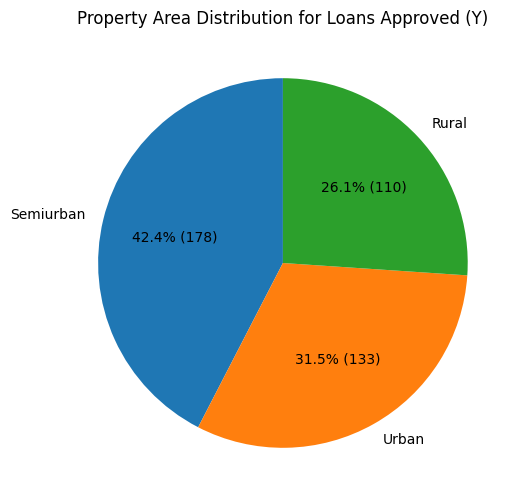

In [124]:
#loan approval by property area distribution
import matplotlib.pyplot as plt
import seaborn as sns

approved_df_AJ = df_AJ[df_AJ['Loan_Status'] == 'Y']

# Calculate the count 
property_area_counts = approved_df_AJ['Property_Area'].value_counts()
total_approved_loans = approved_df_AJ.shape[0]
property_area_percentages = (property_area_counts / total_approved_loans) * 100

#plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(property_area_counts, labels=property_area_counts.index, autopct=lambda p: f'{p:.1f}% ({int(p * total_approved_loans / 100)})', startangle=90)
plt.title("Property Area Distribution for Loans Approved (Y)")

plt.show()


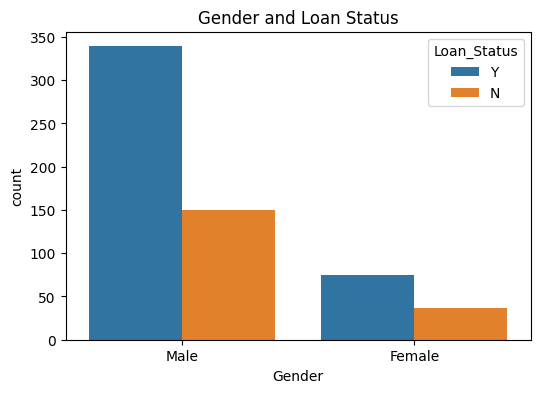

In [125]:
#finding gender wise loan status approval 
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", hue="Loan_Status", data=df_AJ)
plt.title("Gender and Loan Status")
plt.show()

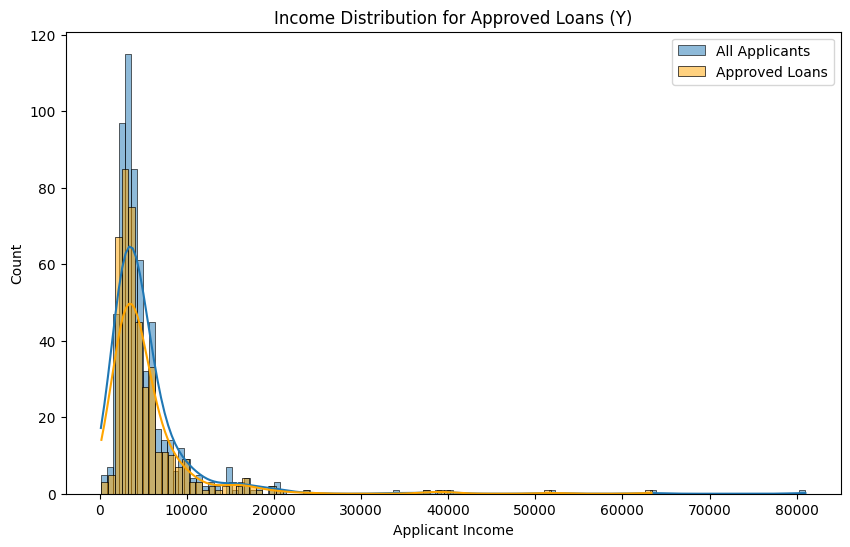

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns



# Filter the DataFrame to include only rows with 'Loan_Status' == 'Y'
approved_df_AJ = df_AJ[df_AJ['Loan_Status'] == 'Y']

# Create a figure and axes
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the histogram for Applicant Income
sns.histplot(df_AJ['ApplicantIncome'], kde=True, ax=ax, label='All Applicants')

# Plot the histogram for Applicant Income for approved loans ('Y')
sns.histplot(approved_df_AJ['ApplicantIncome'], kde=True, ax=ax, color='orange', label='Approved Loans')

# Set labels and title
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.title('Income Distribution for Approved Loans (Y)')

# Add a legend
plt.legend()

# Show the plot
plt.show()


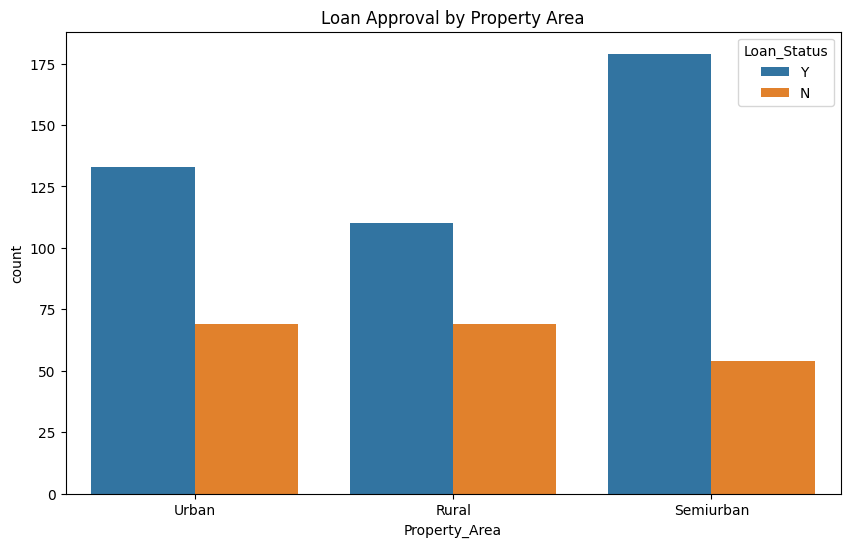

In [127]:
#Loan Approval by Property Area
plt.figure(figsize=(10, 6))
sns.countplot(x="Property_Area", hue="Loan_Status", data=df_AJ)
plt.title("Loan Approval by Property Area")
plt.show()



<h1>Task 3</h1>

In [128]:
df_AJ['Dependents'] = pd.to_numeric(df_AJ['Dependents'], errors='coerce')

# Convert 'LoanAmount' and 'Loan_Amount_Term' columns to numeric
df_AJ['LoanAmount'] = pd.to_numeric(df_AJ['LoanAmount'], errors='coerce')
df_AJ['Loan_Amount_Term'] = pd.to_numeric(df_AJ['Loan_Amount_Term'], errors='coerce')

# Handling missing values
# In this example, we will fill missing values in 'LoanAmount' and 'Loan_Amount_Term' with their respective means
mean_loan_amount = df_AJ['LoanAmount'].mean()
mean_loan_term = df_AJ['Loan_Amount_Term'].mean()

df_AJ['LoanAmount'].fillna(mean_loan_amount, inplace=True)
df_AJ['Loan_Amount_Term'].fillna(mean_loan_term, inplace=True)

# Convert categorical variables to numerical using one-hot encoding
df_AJ = pd.get_dummies(df_AJ, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Convert 'Loan_Status' to binary values
df_AJ['Loan_Status'] = df_AJ['Loan_Status'].map({'Y': 1, 'N': 0})

In [129]:
#checking if the data types of the columns are changed or not 
df_AJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Dependents               548 non-null    float64
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           564 non-null    float64
 7   Loan_Status              614 non-null    int64  
 8   Gender_Male              614 non-null    bool   
 9   Married_Yes              614 non-null    bool   
 10  Education_Not Graduate   614 non-null    bool   
 11  Self_Employed_Yes        614 non-null    bool   
 12  Property_Area_Semiurban  614 non-null    bool   
 13  Property_Area_Urban      614 non-null    bool   
dtypes: bool(6), float64(5), in

In [130]:
df_AJ.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0.0,5849,0.0,146.412162,360.0,1.0,1,True,False,False,False,False,True
1,LP001003,1.0,4583,1508.0,128.000000,360.0,1.0,0,True,True,False,False,False,False
2,LP001005,0.0,3000,0.0,66.000000,360.0,1.0,1,True,True,False,True,False,True
3,LP001006,0.0,2583,2358.0,120.000000,360.0,1.0,1,True,True,True,False,False,True
4,LP001008,0.0,6000,0.0,141.000000,360.0,1.0,1,True,False,False,False,False,True


In [131]:
df_AJ.isnull().sum()

Loan_ID                     0
Dependents                 66
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History             50
Loan_Status                 0
Gender_Male                 0
Married_Yes                 0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [132]:
#from the above code we found that column Dependents and Credit_History contains missing values of 66 and 50 respectively
# Handle missing values in 'Dependents' and 'Credit_History' columns
# Here, we fill missing categorical values with the most frequent value (mode)
df_AJ['Dependents'].fillna(df_AJ['Dependents'].mode()[0], inplace=True)
df_AJ['Credit_History'].fillna(df_AJ['Credit_History'].mode()[0], inplace=True)

# Print the updated count of missing values in each column
print(df_AJ.isnull().sum())


Loan_ID                    0
Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


<Axes: ylabel='CoapplicantIncome'>

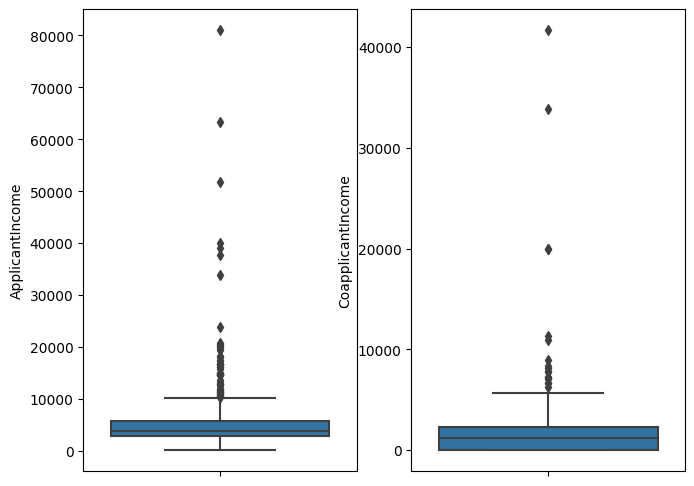

In [133]:
#check for outliers by box plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='ApplicantIncome', data=df_AJ)
plt.subplot(1, 3, 2)
sns.boxplot(y='CoapplicantIncome', data=df_AJ)



In [134]:
def handle_outliers_iqr(df_AJ, column):
    Q1 = df_AJ[column].quantile(0.25)
    Q3 = df_AJ[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_AJ.loc[df_AJ[column] < lower_bound, column] = lower_bound
    df_AJ.loc[df_AJ[column] > upper_bound, column] = upper_bound

# Applying IQR method to 'ApplicantIncome' column
handle_outliers_iqr(df_AJ, 'ApplicantIncome')
handle_outliers_iqr(df_AJ, 'CoapplicantIncome')

<Axes: ylabel='CoapplicantIncome'>

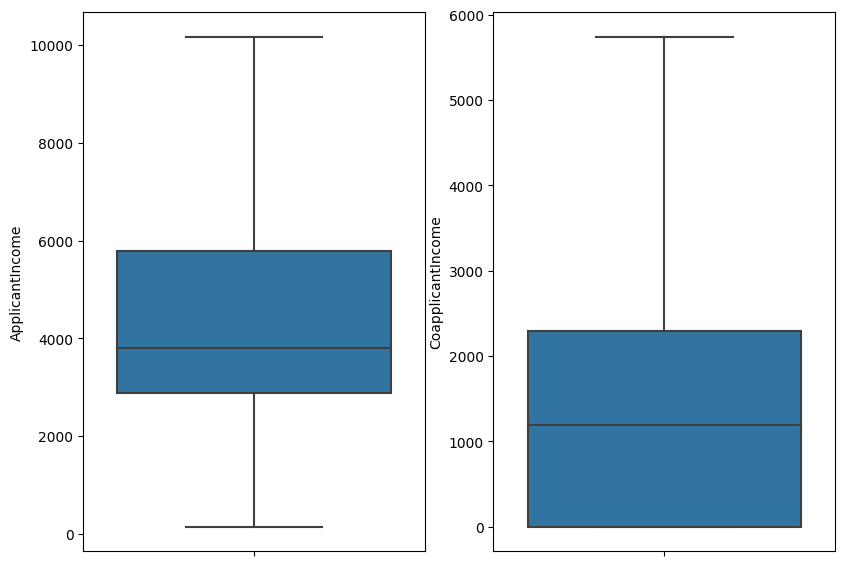

In [135]:
#check for outliers after processing outliers
#check for outliers by box plot
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
sns.boxplot(y='ApplicantIncome', data=df_AJ)
plt.subplot(1, 3, 2)
sns.boxplot(y='CoapplicantIncome', data=df_AJ)


In [136]:
df_AJ.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0.0,5849.0,0.0,146.412162,360.0,1.0,1,True,False,False,False,False,True
1,LP001003,1.0,4583.0,1508.0,128.000000,360.0,1.0,0,True,True,False,False,False,False
2,LP001005,0.0,3000.0,0.0,66.000000,360.0,1.0,1,True,True,False,True,False,True
3,LP001006,0.0,2583.0,2358.0,120.000000,360.0,1.0,1,True,True,True,False,False,True
4,LP001008,0.0,6000.0,0.0,141.000000,360.0,1.0,1,True,False,False,False,False,True


<h1>Task 4</h1>

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming df_AJ is your DataFrame with the dataset

# Separate the target variable (Loan_Status) from the features
X = df_AJ.drop(columns=['Loan_ID', 'Loan_Status','Gender_Male'])
y = df_AJ['Loan_Status']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Model Accuracy:", accuracy_logistic)
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix_logistic)
print("Classification Report (Logistic Regression):")
print(classification_report_logistic)

# Train Random Forest Classifier model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate Random Forest Classifier model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier Model Accuracy:", accuracy_rf)
print("Confusion Matrix (Random Forest Classifier):")
print(confusion_matrix_rf)
print("Classification Report (Random Forest Classifier):")
print(classification_report_rf)


Logistic Regression Model Accuracy: 0.7886178861788617
Confusion Matrix (Logistic Regression):
[[18 25]
 [ 1 79]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Random Forest Classifier Model Accuracy: 0.7886178861788617
Confusion Matrix (Random Forest Classifier):
[[19 24]
 [ 2 78]]
Classification Report (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



<p>The accuracy of the Random Forest Classifier model (0.7724) is slightly lower than that of the Logistic Regression model (0.7886). However, compared to the Logistic Regression model, the Random Forest model has a greater recall for class 0 (0.44), indicating that it is more effective at detecting true negatives. However, compared to the Random Forest model, the Logistic Regression model has a greater recall for class 1 (0.99) than it does for class 2 (0.95), indicating that it is more effective at detecting true positives.</p>

<h1>Task 5</h1>

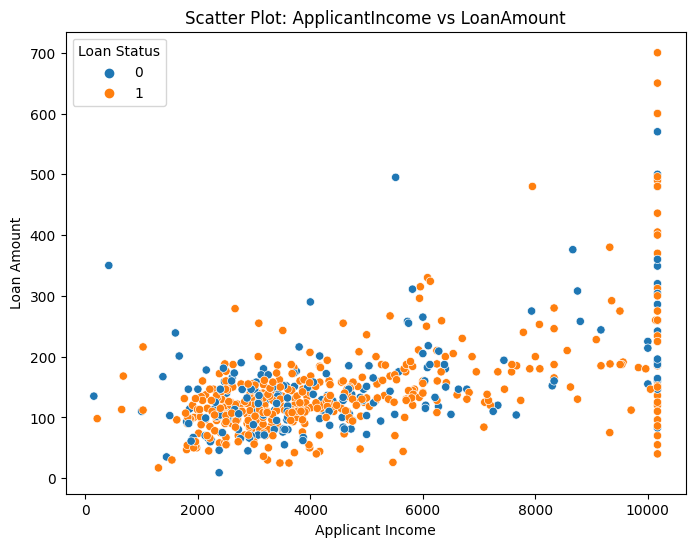

In [138]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_AJ, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title('Scatter Plot: ApplicantIncome vs LoanAmount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

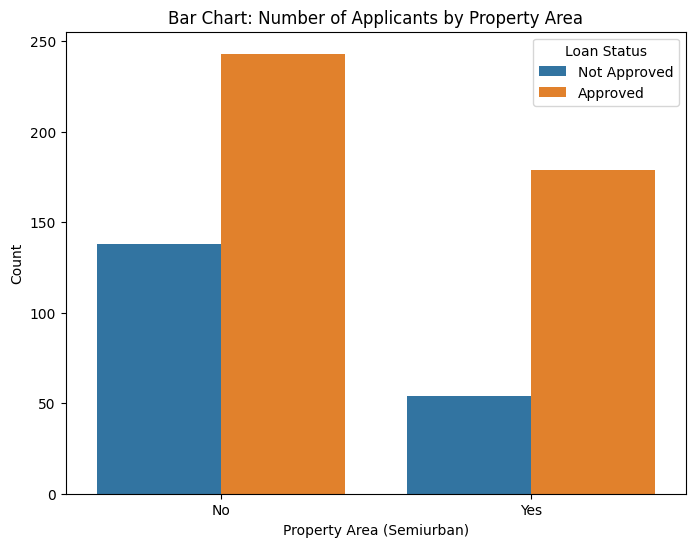

In [139]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_AJ, x='Property_Area_Semiurban', hue='Loan_Status')
plt.title('Bar Chart: Number of Applicants by Property Area')
plt.xlabel('Property Area (Semiurban)')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()